In [2]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
import pandas as pd

In [3]:
ccdata=pd.read_csv('ccdata_final.csv')
ccdata_new=pd.read_csv('df1 (1).csv')

In [4]:
ccdata

,Unnamed: 0,Date,Tweets,Prices,Comp,Negative,Neutral,Positive,target
0,0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...,20.036428,0.0000,0.0,1.000,0.000,1
1,1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...,19.895535,0.0000,0.0,1.000,0.000,1
2,2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE,19.895535,0.4019,0.0,0.690,0.310,2
3,3,2014-01-01,iPhone users are more intelligent than Samsung...,19.895535,0.5095,0.0,0.798,0.202,2
4,4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...,19.895535,0.0000,0.0,1.000,0.000,1
...,...,...,...,...,...,...,...,...,...
17645,17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...,27.000000,0.6369,0.0,0.741,0.259,2
17646,17646,2016-03-31,Apple now collecting some ResearchKit data fro...,27.000000,0.0000,0.0,1.000,0.000,1
17647,17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...,27.000000,0.0000,0.0,1.000,0.000,1
17648,17648,2016-03-31,RT businessinsider This guy found a hidden way...,27.000000,0.4767,0.0,0.860,0.140,2


In [5]:
ccdata_new
ccdata_new.drop(columns=['Unnamed: 0'])

,Date,Prices,Comp,Negative,Neutral,Positive
0,2013-12-31,20.036428,0.000000,0.000000,1.000000,0.000000
1,2014-01-01,19.895535,0.069583,0.052333,0.862333,0.085333
2,2014-01-02,19.754642,0.099858,0.046417,0.885542,0.068000
3,2014-01-03,19.320715,-0.011772,0.098111,0.806000,0.095889
4,2014-01-04,19.373393,0.170180,0.000000,0.909000,0.091000
...,...,...,...,...,...,...
778,2016-03-27,26.357501,0.227836,0.000000,0.916545,0.083455
779,2016-03-28,26.297501,0.058890,0.056207,0.866552,0.077241
780,2016-03-29,26.920000,-0.046177,0.071615,0.876410,0.051949
781,2016-03-30,27.389999,0.089632,0.018464,0.915893,0.065679


In [6]:
df_=ccdata_new[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [7]:
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2013-12-31,20.036428,0.000000,0.000000,1.000000,0.000000
1,2014-01-01,19.895535,0.069583,0.052333,0.862333,0.085333
2,2014-01-02,19.754642,0.099858,0.046417,0.885542,0.068000
3,2014-01-03,19.320715,-0.011772,0.098111,0.806000,0.095889
4,2014-01-04,19.373393,0.170180,0.000000,0.909000,0.091000
...,...,...,...,...,...,...
778,2016-03-27,26.357501,0.227836,0.000000,0.916545,0.083455
779,2016-03-28,26.297501,0.058890,0.056207,0.866552,0.077241
780,2016-03-29,26.920000,-0.046177,0.071615,0.876410,0.051949
781,2016-03-30,27.389999,0.089632,0.018464,0.915893,0.065679


In [8]:
# train_start_index = 0
# train_end_index = 626
# test_start_index = 627
# test_end_index = 782
# train = df_.loc[train_start_index : train_end_index]
# test = df_.loc[test_start_index:test_end_index]
data = df_.filter(['Prices'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

627

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14201568],
       [0.13286721],
       [0.12371874],
       [0.09554297],
       [0.09896346],
       [0.09896346],
       [0.10238395],
       [0.09336313],
       [0.10129406],
       [0.08520014],
       [0.07689812],
       [0.08013316],
       [0.08013316],
       [0.08336821],
       [0.10808875],
       [0.13352815],
       [0.12631608],
       [0.1203099 ],
       [0.1203099 ],
       [0.11430372],
       [0.11996209],
       [0.13079172],
       [0.1073467 ],
       [0.11248322],
       [0.11248322],
       [0.11761973],
       [0.01558382],
       [0.00224944],
       [0.        ],
       [0.0019016 ],
       [0.00297993],
       [0.00297993],
       [0.00405825],
       [0.02089416],
       [0.02970648],
       [0.0295209 ],
       [0.04614812],
       [0.0569431 ],
       [0.0569431 ],
       [0.06773809],
       [0.08390162],
       [0.08380871],
       [0.10354357],
       [0.10252303],
       [0.10484208],
       [0.10484208],
       [0.10484208],
       [0.107

In [10]:
train_data = scaled_data[0:training_data_len , :]

In [11]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.14201568, 0.13286721, 0.12371874, 0.09554297, 0.09896346,
       0.09896346, 0.10238395, 0.09336313, 0.10129406, 0.08520014,
       0.07689812, 0.08013316, 0.08013316, 0.08336821, 0.10808875,
       0.13352815, 0.12631608, 0.1203099 , 0.1203099 , 0.11430372,
       0.11996209, 0.13079172, 0.1073467 , 0.11248322, 0.11248322,
       0.11761973, 0.01558382, 0.00224944, 0.        , 0.0019016 ,
       0.00297993, 0.00297993, 0.00405825, 0.02089416, 0.02970648,
       0.0295209 , 0.04614812, 0.0569431 , 0.0569431 , 0.06773809,
       0.08390162, 0.08380871, 0.10354357, 0.10252303, 0.10484208,
       0.10484208, 0.10484208, 0.10716113, 0.08717134, 0.07274714,
       0.05906498, 0.06173181, 0.06173181, 0.06439863, 0.05166741,
       0.04074493, 0.06467706, 0.06136092, 0.06312334, 0.06312334])]
[0.06488575368091642]

[array([0.14201568, 0.13286721, 0.12371874, 0.09554297, 0.09896346,
       0.09896346, 0.10238395, 0.09336313, 0.10129406, 0.08520014,
       0.07689812, 0.08013316, 0.08

In [12]:
data_ = df_.filter(['Comp'])
dataset_ = data_.values

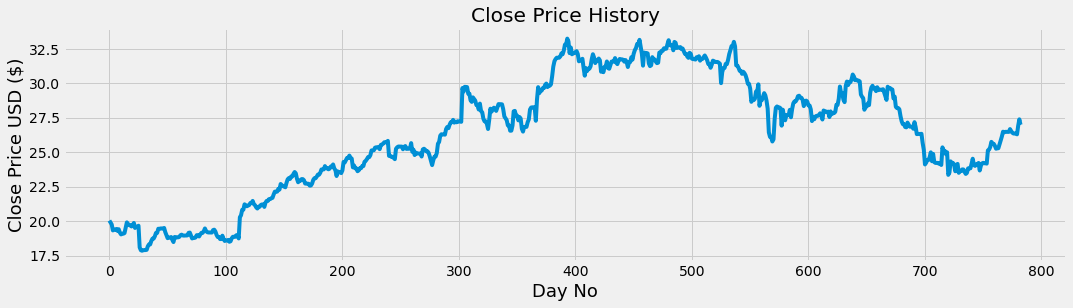

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,4))
plt.title('Close Price History')
plt.plot(df_['Prices'])
plt.xlabel('Day No', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [14]:
import numpy as np

In [15]:
for i in range(60,627):
  x=np.array(dataset_[i])
  x_train[i-60]=np.append(x_train[i-60],x)

In [16]:
x_train[0]

array([ 0.14201568,  0.13286721,  0.12371874,  0.09554297,  0.09896346,
        0.09896346,  0.10238395,  0.09336313,  0.10129406,  0.08520014,
        0.07689812,  0.08013316,  0.08013316,  0.08336821,  0.10808875,
        0.13352815,  0.12631608,  0.1203099 ,  0.1203099 ,  0.11430372,
        0.11996209,  0.13079172,  0.1073467 ,  0.11248322,  0.11248322,
        0.11761973,  0.01558382,  0.00224944,  0.        ,  0.0019016 ,
        0.00297993,  0.00297993,  0.00405825,  0.02089416,  0.02970648,
        0.0295209 ,  0.04614812,  0.0569431 ,  0.0569431 ,  0.06773809,
        0.08390162,  0.08380871,  0.10354357,  0.10252303,  0.10484208,
        0.10484208,  0.10484208,  0.10716113,  0.08717134,  0.07274714,
        0.05906498,  0.06173181,  0.06173181,  0.06439863,  0.05166741,
        0.04074493,  0.06467706,  0.06136092,  0.06312334,  0.06312334,
       -0.01156667])

In [17]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(567, 61, 1)

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
567/567 [==============================] - 53s 77ms/step - loss: 0.0243
Epoch 2/20
567/567 [==============================] - 43s 75ms/step - loss: 0.0027
Epoch 3/20
567/567 [==============================] - 41s 72ms/step - loss: 0.0034
Epoch 4/20
567/567 [==============================] - 37s 65ms/step - loss: 0.0019
Epoch 5/20
567/567 [==============================] - 44s 78ms/step - loss: 0.0017
Epoch 6/20
567/567 [==============================] - 44s 77ms/step - loss: 0.0017
Epoch 7/20
567/567 [==============================] - 45s 79ms/step - loss: 0.0017
Epoch 8/20
567/567 [==============================] - 45s 78ms/step - loss: 0.0017
Epoch 9/20
567/567 [==============================] - 45s 80ms/step - loss: 0.0014
Epoch 10/20
567/567 [==============================] - 44s 78ms/step - loss: 9.8918e-04
Epoch 11/20
567/567 [==============================] - 44s 78ms/step - loss: 0.0012
Epoch 12/20
567/567 [==============================] - 45s 80ms/step - loss: 8.27

In [23]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

In [24]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [25]:
for i in range(627,783):
  x=np.array(dataset_[i])
  x_test[i-627]=np.append(x_test[i-627],x)

In [26]:
x_test[0]

array([0.53638523, 0.53638523, 0.51495765, 0.52502199, 0.62160854,
       0.67404111, 0.68004732, 0.67574561, 0.67574561, 0.67144389,
       0.58962944, 0.6646259 , 0.63264699, 0.61479055, 0.63946473,
       0.63946473, 0.63946473, 0.66413891, 0.62907566, 0.66835955,
       0.69498169, 0.70390982, 0.70390982, 0.71283794, 0.72858403,
       0.73069439, 0.72095455, 0.72095455, 0.71121471, 0.68183295,
       0.69676733, 0.70780577, 0.7030982 , 0.68467376, 0.68467376,
       0.66624933, 0.61138161, 0.63151068, 0.61982285, 0.63280919,
       0.63605583, 0.63605583, 0.63930246, 0.64790589, 0.63930246,
       0.6185242 , 0.66105476, 0.65683415, 0.65683415, 0.65261353,
       0.6556978 , 0.63004964, 0.65683411, 0.64352304, 0.64912347,
       0.64912347, 0.65472389, 0.6878391 , 0.6876769 , 0.71592228,
       0.14363333])

In [27]:
x_test = np.array(x_test)

In [28]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [29]:
predictions = model.predict(x_test)
predictions
predictions = scaler.inverse_transform(predictions)

In [30]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.44123713371041906

In [31]:
mse= np.mean((predictions-y_test)**2)
mse

0.19469020816498622

/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


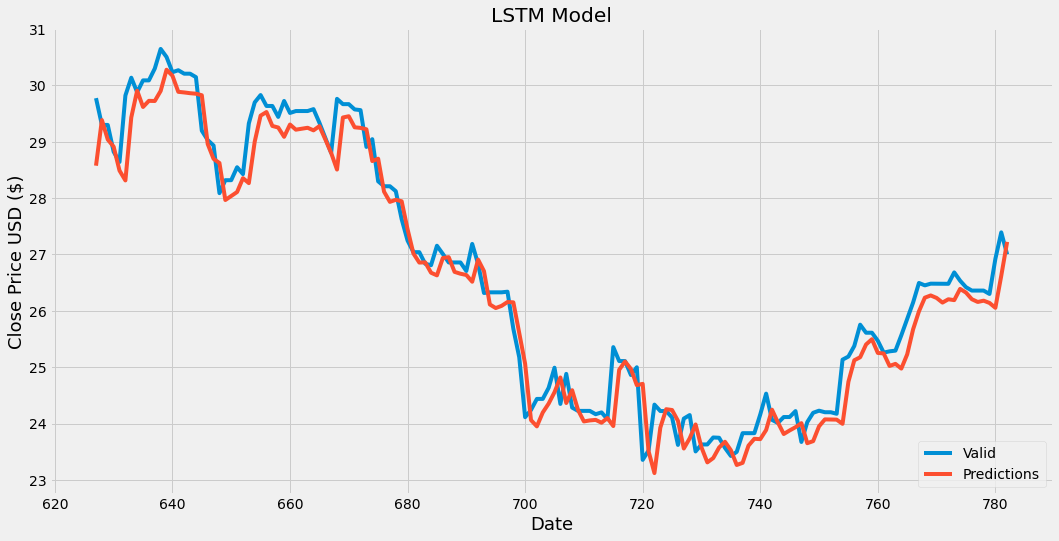

In [33]:
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Prices', 'Predictions']])
plt.legend(['Valid', 'Predictions'], loc='lower right')
plt.show()